In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\mahit\OneDrive\Desktop\1dogg.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))

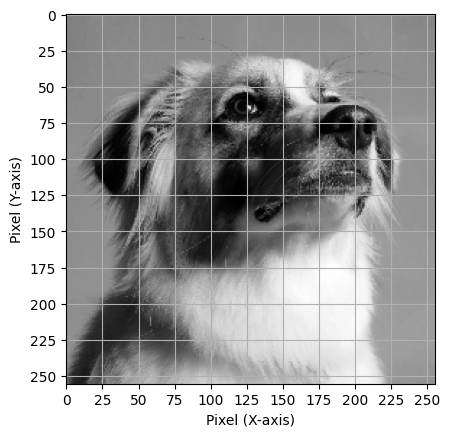

In [83]:
plt.imshow(img, cmap='gray')
plt.grid(True)
plt.xlabel("Pixel (X-axis)")
plt.ylabel("Pixel (Y-axis)")
plt.xticks(range(0, 257, 25)) 
plt.yticks(range(0, 257, 25))
plt.show()

## Canny Edge Detection: Multi-Stage Algorithm

Canny optimizes edge detection by maximizing signal-to-noise ratio and localization through a multi-stage process.

---

### 1. Gaussian Smoothing

To reduce noise before edge detection:

$$
I_s(x, y) = I(x, y) * G(x, y; \sigma)
$$

Where:

- $ I(x, y) $: original image  
- $ G(x, y; \sigma) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}} $: 2D Gaussian  
- $ * $: 2D convolution

---

### 2. Gradient Computation

Use Sobel filters $ S_x $ and $ S_y $ to approximate image gradients:

$$
G_x(x, y) = \frac{\partial I_s}{\partial x} \approx I_s * S_x
$$

$$
G_y(x, y) = \frac{\partial I_s}{\partial y} \approx I_s * S_y
$$

Gradient magnitude and orientation:

$$
M(x, y) = \sqrt{G_x^2 + G_y^2}
$$

$$
\theta(x, y) = \tan^{-1}\left(\frac{G_y}{G_x}\right)
$$

---

### 3. Non-Maximum Suppression

Thins edges by keeping only local maxima in the gradient direction $ \theta(x, y) $.

- Compare $ M(x, y) $ with interpolated neighbors along $ \theta $
- Set to 0 if not a local maximum

---

### 4. Double Thresholding

Use thresholds $ T_{\text{low}} $ and $ T_{\text{high}} $:

- **Strong edge**: $ M(x, y) > T_{\text{high}} $  
- **Weak edge**: $ T_{\text{low}} < M(x, y) \leq T_{\text{high}} $  
- **Discard**: $ M(x, y) < T_{\text{low}} $

In [85]:
edges_canny = cv2.Canny(img, 100, 200)

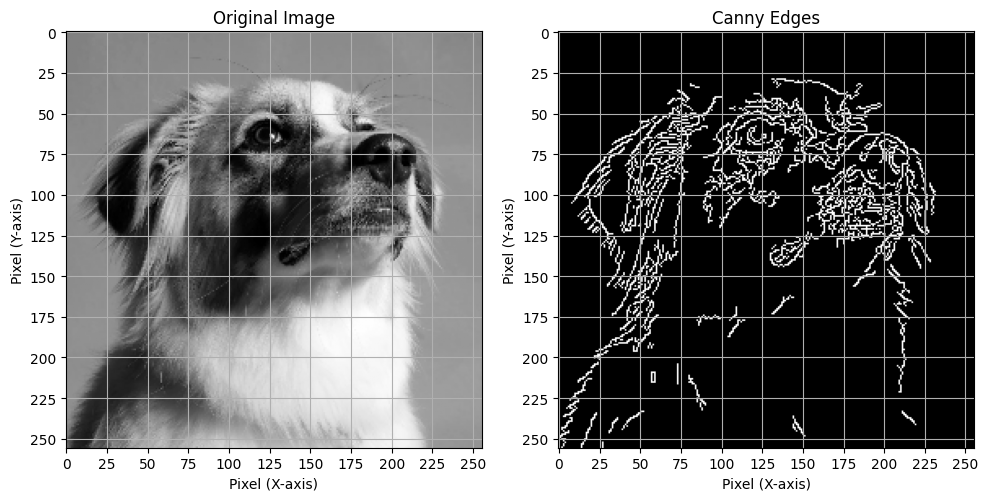

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Original Image")
axs[0].set_xlabel("Pixel (X-axis)")
axs[0].set_ylabel("Pixel (Y-axis)")
axs[0].grid(True)
axs[0].set_xticks(range(0, 257, 25))
axs[0].set_yticks(range(0, 257, 25))

# Canny edges
axs[1].imshow(edges_canny, cmap='gray')
axs[1].set_title("Canny Edges")
axs[1].set_xlabel("Pixel (X-axis)")
axs[1].set_ylabel("Pixel (Y-axis)")
axs[1].grid(True)
axs[1].set_xticks(range(0, 257, 25))
axs[1].set_yticks(range(0, 257, 25))

plt.tight_layout()
plt.show()

## Laplacian of Gaussian (LoG) Edge Detection

LoG detects edges by finding **zero-crossings** of the second derivative after smoothing the image with a Gaussian. It combines **noise suppression** and **precise edge localization**.

---

### 1. Gaussian Smoothing

Apply Gaussian blur to reduce noise:

$$
G(x, y; \sigma) = \frac{1}{2\pi\sigma^2} \, e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

$$
I_s(x, y) = I(x, y) * G(x, y; \sigma)
$$

Where:

- $ I(x, y) $: original image  
- $ * $: 2D convolution  
- $ \sigma $: controls the smoothing scale

---

### 2. Laplacian Operator (Second Derivative)

The Laplacian $\nabla^2 $ is the sum of second partial derivatives:

$$
\nabla^2 I = \frac{\partial^2 I}{\partial x^2} + \frac{\partial^2 I}{\partial y^2}
$$

Apply it to the smoothed image:

$$
\text{LoG}(x, y) = \nabla^2(I * G) = I * (\nabla^2 G)
$$

Rather than smoothing then applying the Laplacian, we precompute the **Laplacian of Gaussian kernel**.

---

### 3. Laplacian of Gaussian Kernel

The LoG kernel is:

$$
\nabla^2 G(x, y; \sigma) = \left( \frac{x^2 + y^2 - 2\sigma^2}{\sigma^4} \right) \cdot G(x, y; \sigma)
$$

This single kernel **combines smoothing and edge detection**.

---

### 4. Edge Detection via Zero-Crossings

After convolution:

$$
L(x, y) = I(x, y) * \nabla^2 G(x, y; \sigma)
$$

Edges are detected by **zero-crossings** in \$ L(x, y) $:

- A zero-crossing occurs when the sign of $ L $ changes between neighboring pixels  
- Typically checked using 8-connected neighbors

---

###  Discrete LoG Kernel (Approximation)

For small filters, a discrete LoG kernel example:

$$
\begin{bmatrix}
0 & 0 & -1 & 0 & 0 \\
0 & -1 & -2 & -1 & 0 \\
-1 & -2 & 16 & -2 & -1 \\
0 & -1 & -2 & -1 & 0 \\
0 & 0 & -1 & 0 & 0
\end{bmatrix}
$$

In [88]:
edges_laplacian = cv2.Laplacian(img, cv2.CV_64F)

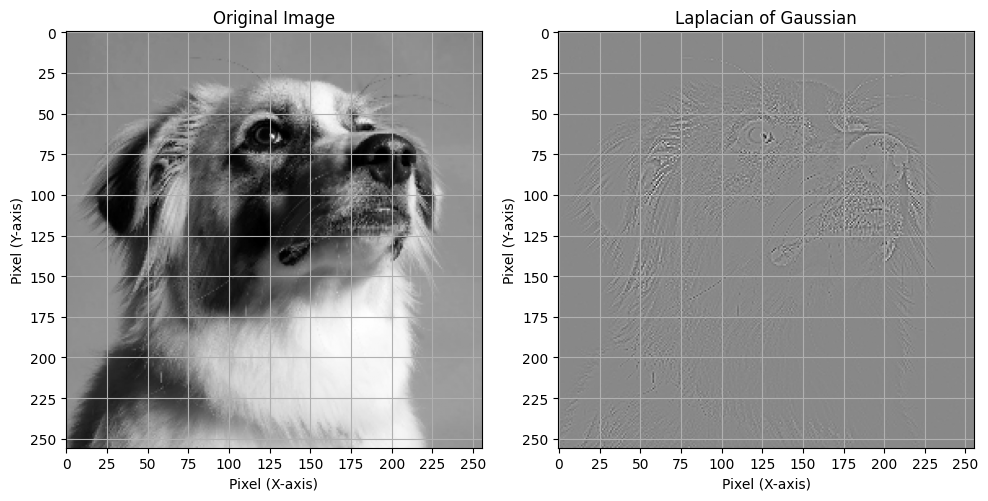

In [89]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Original Image")
axs[0].set_xlabel("Pixel (X-axis)")
axs[0].set_ylabel("Pixel (Y-axis)")
axs[0].grid(True)
axs[0].set_xticks(range(0, 257, 25))
axs[0].set_yticks(range(0, 257, 25))

# Canny edges
axs[1].imshow(edges_laplacian, cmap='gray')
axs[1].set_title("Laplacian of Gaussian")
axs[1].set_xlabel("Pixel (X-axis)")
axs[1].set_ylabel("Pixel (Y-axis)")
axs[1].grid(True)
axs[1].set_xticks(range(0, 257, 25))
axs[1].set_yticks(range(0, 257, 25))

plt.tight_layout()
plt.show()

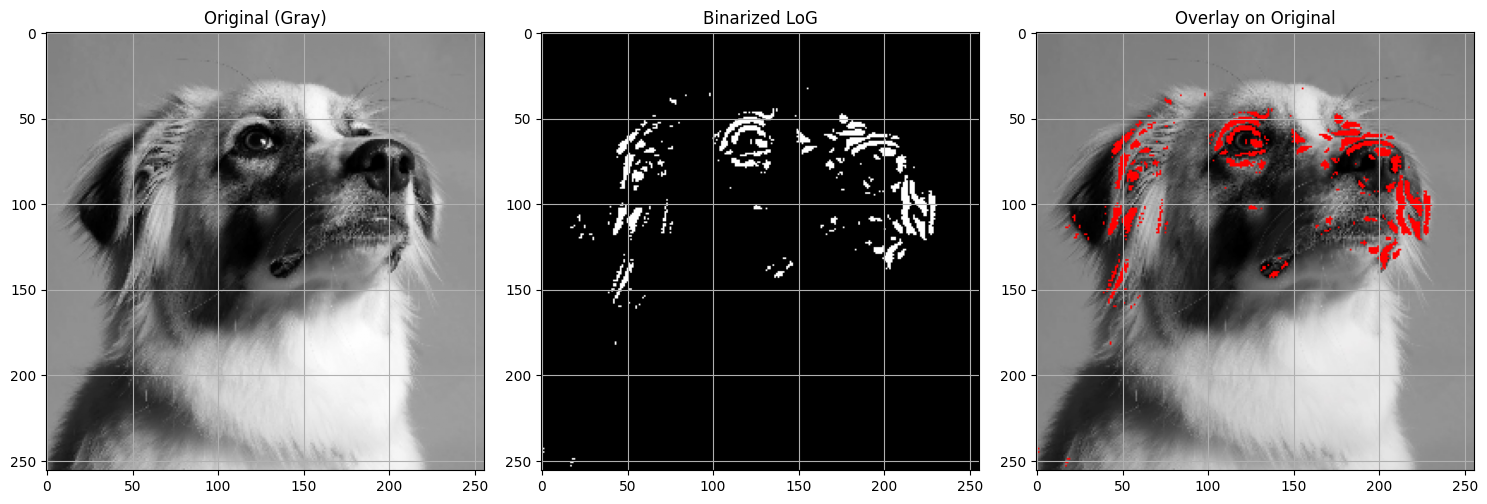

In [90]:
img_gray = cv2.imread(r"C:\Users\mahit\OneDrive\Desktop\1dogg.jpg", cv2.IMREAD_GRAYSCALE)
img_gray = cv2.resize(img_gray, (256, 256))
img_color = cv2.imread(r"C:\Users\mahit\OneDrive\Desktop\1dogg.jpg")
img_color = cv2.resize(img_color, (256, 256))

# Apply Gaussian Blur first (LoG = Gaussian + Laplacian)
blurred = cv2.GaussianBlur(img_gray, (15, 15), sigmaX=2)

# Apply Laplacian operator
log = cv2.Laplacian(blurred, ddepth=cv2.CV_64F, ksize=3)
log = np.uint8(np.absolute(log))  # Convert to 8-bit image

# Binarize LoG
_, binary_log = cv2.threshold(log, 20, 255, cv2.THRESH_BINARY)

# Overlay edges on color image (red edges)
overlay_log = img_color.copy()
overlay_log[binary_log > 0] = [0, 0, 255]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original (Gray)")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.imshow(binary_log, cmap='gray')
plt.title("Binarized LoG")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay_log, cv2.COLOR_BGR2RGB))
plt.title("Overlay on Original")
plt.grid(True)

plt.tight_layout()
plt.show()


## Difference of Gaussians (DoG)

DoG approximates the Laplacian of Gaussian (LoG) by subtracting two Gaussian-blurred images with different standard deviations. It is computationally efficient and widely used in **blob detection** (e.g., SIFT).

---

### 1. Gaussian Blurring

Apply two Gaussian filters to the image $ I(x, y) $ with different standard deviations $ \sigma_1 $ and $ \sigma_2 $, where $ \sigma_2 > \sigma_1 $:

$$
G(x, y; \sigma_1) = \frac{1}{2\pi\sigma_1^2} \, e^{-\frac{x^2 + y^2}{2\sigma_1^2}}, \quad G(x, y; \sigma_2)
$$

Convolve the image:

$$
I_{\sigma_1} = I * G(x, y; \sigma_1), \quad I_{\sigma_2} = I * G(x, y; \sigma_2)
$$

---

### 2. Difference of Gaussians

Subtract the two smoothed images:

$$
\text{DoG}(x, y) = I_{\sigma_1}(x, y) - I_{\sigma_2}(x, y) = I * \left(G_{\sigma_1} - G_{\sigma_2}\right)
$$

---

### 3. Why This Works

Mathematically, DoG approximates the Laplacian of Gaussian:

$$
\text{DoG}(x, y) \approx \sigma^2 \cdot \nabla^2 G(x, y) = \text{LoG}(x, y)
$$

Thus, DoG acts as an efficient approximation to **LoG**, useful for detecting **edges and blobs**.


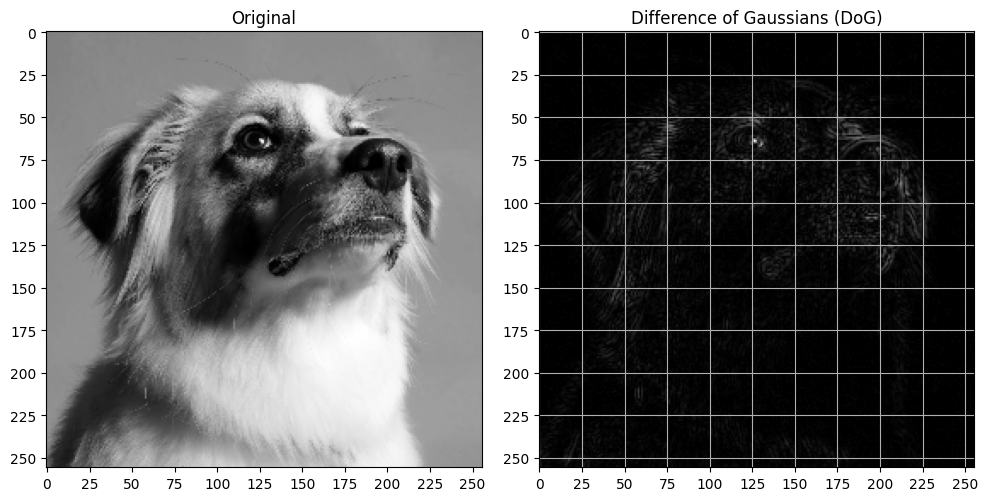

In [92]:
blur1 = cv2.GaussianBlur(img, (5, 5), sigmaX=1)
blur2 = cv2.GaussianBlur(img, (5, 5), sigmaX=2)

# Difference of Gaussians
dog = cv2.absdiff(blur1, blur2)

# Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('on')
plt.xticks(range(0, 257, 25))
plt.yticks(range(0, 257, 25))

plt.subplot(1, 2, 2)
plt.imshow(dog, cmap='gray')
plt.title("Difference of Gaussians (DoG)")
plt.axis('on')
plt.xticks(range(0, 257, 25))
plt.yticks(range(0, 257, 25))
plt.grid(True)

plt.tight_layout()
plt.show()

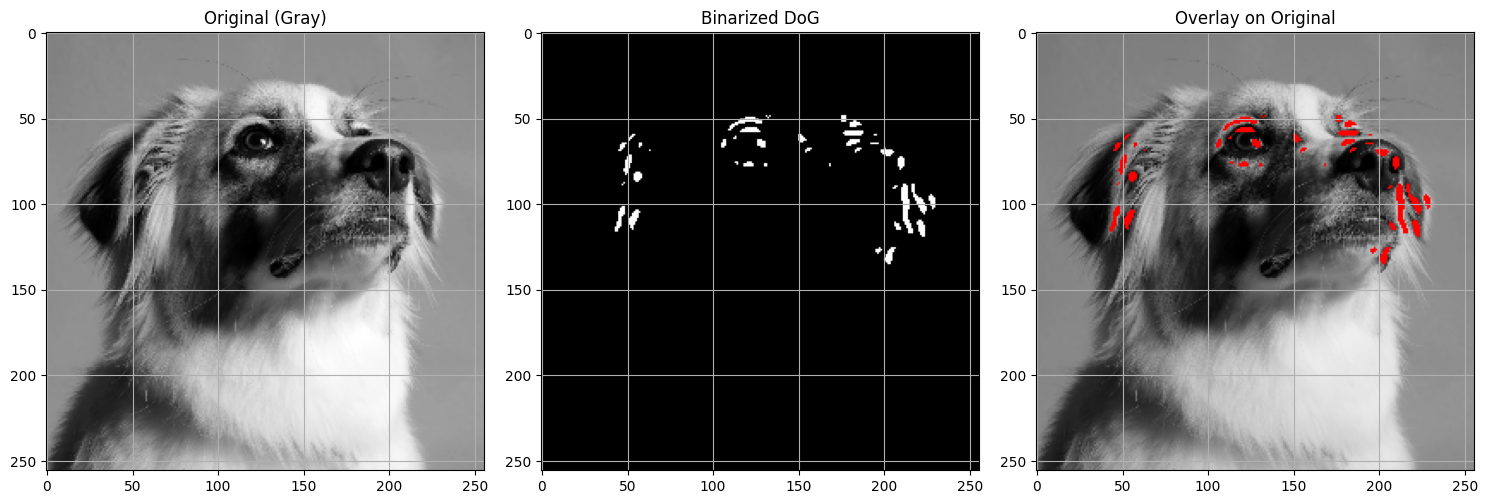

In [93]:
img_gray = cv2.imread(r"C:\Users\mahit\OneDrive\Desktop\1dogg.jpg", cv2.IMREAD_GRAYSCALE)
img_gray = cv2.resize(img_gray, (256, 256))

# Also load in color for overlay
img_color = cv2.imread(r"C:\Users\mahit\OneDrive\Desktop\1dogg.jpg")
img_color = cv2.resize(img_color, (256, 256))

# Apply two Gaussian blurs with large kernels
blur1 = cv2.GaussianBlur(img_gray, (15, 15), sigmaX=2)
blur2 = cv2.GaussianBlur(img_gray, (15, 15), sigmaX=4)

# Difference of Gaussians
dog = cv2.absdiff(blur1, blur2)

# Binarize with threshold
_, binary_mask = cv2.threshold(dog, 20, 255, cv2.THRESH_BINARY)

# Overlay edges on color image (e.g., draw edges in red)
overlay = img_color.copy()
overlay[binary_mask > 0] = [0, 0, 255]  # Red where edges are

# Plot all
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original (Gray)")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.imshow(binary_mask, cmap='gray')
plt.title("Binarized DoG")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay on Original")
plt.grid(True)

plt.tight_layout()
plt.show()

## Scharr Edge Detection


The **Scharr operator** improves upon the Sobel operator by providing better rotational symmetry and more accurate gradient estimation, especially for detecting fine edges.

---

### 1. Gradient Estimation

Scharr uses the following convolution kernels:

**Scharr X** (detects vertical edges):

$$
K_x =
\begin{bmatrix}
-3 & 0 & 3 \\
-10 & 0 & 10 \\
-3 & 0 & 3
\end{bmatrix}
$$

**Scharr Y** (detects horizontal edges):

$$
K_y =
\begin{bmatrix}
-3 & -10 & -3 \\
0 & 0 & 0 \\
3 & 10 & 3
\end{bmatrix}
$$

These kernels emphasize central differences more than Sobel.

---

### 2. Apply Convolution

Let $ I $ be the image:

$$
G_x = I * K_x, \quad G_y = I * K_y
$$

where $ * $ denotes 2D convolution.

---

### 3. Gradient Magnitude and Direction

**Magnitude:**

$$
G = \sqrt{G_x^2 + G_y^2}
$$

**Direction:**

$$
\theta = \arctan\left(\frac{G_y}{G_x}\right)
$$


In [95]:
scharr_x = cv2.Scharr(img, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(img, cv2.CV_64F, 0, 1)
edges_scharr = cv2.magnitude(scharr_x, scharr_y)

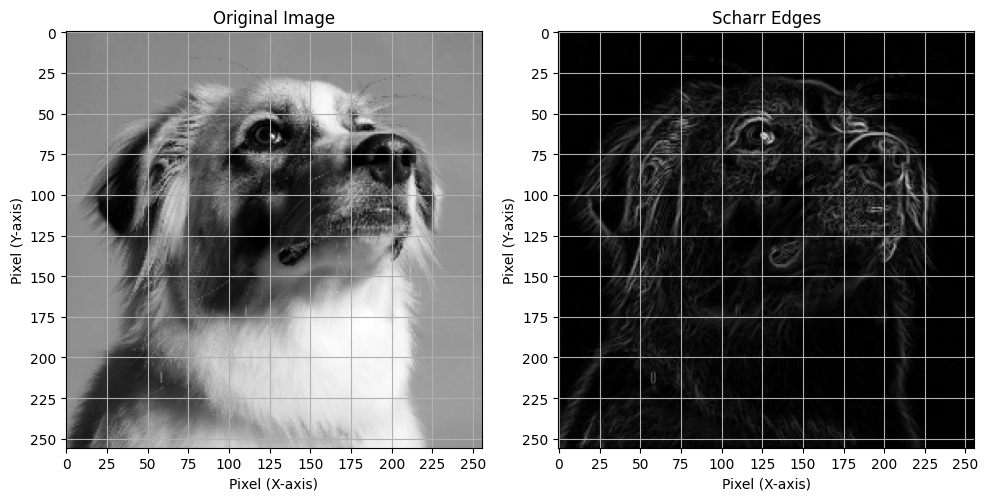

In [96]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Original Image")
axs[0].set_xlabel("Pixel (X-axis)")
axs[0].set_ylabel("Pixel (Y-axis)")
axs[0].grid(True)
axs[0].set_xticks(range(0, 257, 25))
axs[0].set_yticks(range(0, 257, 25))

# Canny edges
axs[1].imshow(edges_scharr, cmap='gray')
axs[1].set_title("Scharr Edges")
axs[1].set_xlabel("Pixel (X-axis)")
axs[1].set_ylabel("Pixel (Y-axis)")
axs[1].grid(True)
axs[1].set_xticks(range(0, 257, 25))
axs[1].set_yticks(range(0, 257, 25))

plt.tight_layout()
plt.show()

## Prewitt Edge Detection

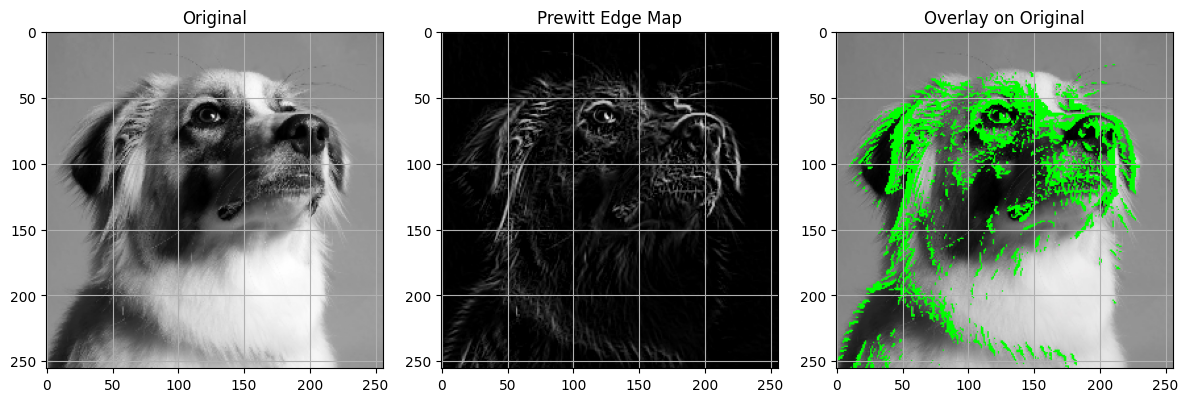

In [101]:
# Define Prewitt kernels
kernel_prewitt_x = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]], dtype=np.float32)

kernel_prewitt_y = np.array([[1,  1,  1],
                             [0,  0,  0],
                             [-1, -1, -1]], dtype=np.float32)

# Apply filters
prewitt_x = cv2.filter2D(img, -1, kernel_prewitt_x)
prewitt_y = cv2.filter2D(img, -1, kernel_prewitt_y)

# Magnitude of gradient
edges_prewitt = cv2.magnitude(np.float32(prewitt_x), np.float32(prewitt_y))
edges_prewitt = cv2.normalize(edges_prewitt, None, 0, 255, cv2.NORM_MINMAX)
edges_prewitt = np.uint8(edges_prewitt)

# Overlay edges (optional)
img_color = cv2.imread(r"C:\Users\mahit\OneDrive\Desktop\1dogg.jpg")
img_color = cv2.resize(img_color, (256, 256))
overlay = img_color.copy()
overlay[edges_prewitt > 30] = [0, 255, 0]  # green edges

# Plot results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.imshow(edges_prewitt, cmap='gray')
plt.title("Prewitt Edge Map")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay on Original")
plt.grid(True)

plt.tight_layout()
plt.show()


## Harris Corner Detection

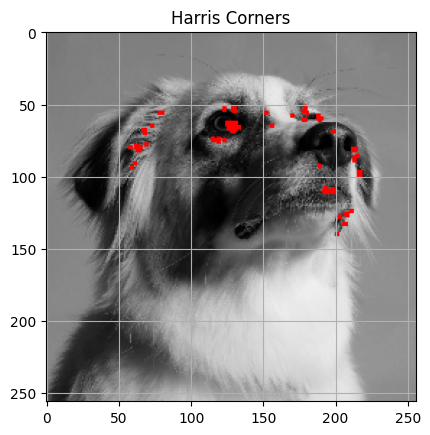

In [107]:
img = cv2.imread(r"C:\Users\mahit\OneDrive\Desktop\1dogg.jpg")
img = cv2.resize(img, (256, 256))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Harris Corner Detection
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)
img_harris = img.copy()
img_harris[dst > 0.01 * dst.max()] = [0, 0, 255]

# Plot
plt.imshow(cv2.cvtColor(img_harris, cv2.COLOR_BGR2RGB))
plt.title("Harris Corners")
plt.grid(True)
plt.show()